### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [415]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [416]:
data = pd.read_csv('data/coupons.csv')

In [417]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [418]:
'''
I begin with a few objectives here:
- Explore the data and make note of the total observations/instances in the coupons file
- Rename or update and column names as necessary
- Identify null values and investigate unique values for some of the columns
'''

# Begin investigation of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [419]:
# Fix the `passanger` typo in the dataframe. Confirm changes with head() or info()
data = data.rename(columns={'passanger':'passenger'})
# data.info()
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [420]:
# Get count of null values in the columns
null_values = data.isnull().sum()
null_values

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [421]:
# There are null values in the columns in ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']. 
# I'm curious to see what unique values are in some of these columns
car_column = data['car']
print('Car', car_column.unique())

carry_away = data['CarryAway']
print('Carry Away', carry_away.unique())

Car [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
Carry Away [nan '4~8' '1~3' 'gt8' 'less1' 'never']


3. Decide what to do about your missing data -- drop, replace, other...

In [422]:
'''
There are several null values in one column in particular. 
I don't want to get rid of the rest of that data so I decide to first exclude the `car` column. 
Then I want to use dropna() on this subset to clear other null values and assign this new dataset to a variable `cleaned`.
'''

# Exclude the 'car' column
cleaned = data.drop(columns=['car'])

# Remove nulls
cleaned = cleaned.dropna()

# Check the new dataset. See total entries compared to original 'data' dataframe
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon? 



In [423]:
'''
After progressing through the project, I found I would be grabbing the proportion of observations that accepted the coupon several times.
I decided to create a function called getProportionAccepted to return this. The function accepts a dataframe, which I call 'df' 
and runs the .value_counts() method. I include normalize=True to return the proportion and not just the sum of the counts for the Y values
'''

# Originally used--
# y_vals = cleaned['Y'].value_counts(normalize=True)

def getProportionAccepted(df):
    return df['Y'].value_counts(normalize=True)

y_vals = getProportionAccepted(cleaned)
y_vals

print(f'The proportion of the total observations in the cleaned dataset that chose to accept the coupon is {y_vals[1].round(6)}, or {y_vals[1].round(6) * 100}%')

The proportion of the total observations in the cleaned dataset that chose to accept the coupon is 0.569335, or 56.9335%


5. Use a bar plot to visualize the `coupon` column.

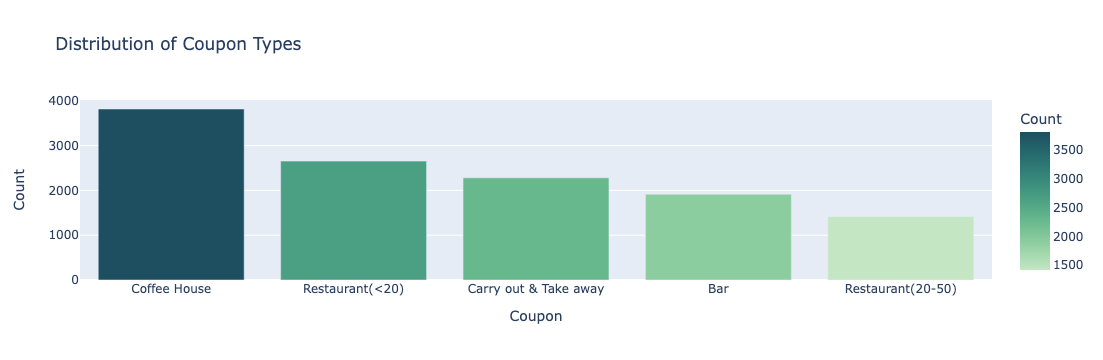

In [424]:
# Sum the counts of unique values in coupon
coupon_count = cleaned['coupon'].value_counts()

# Create a bar plot, displaying the counts of each unique coupon type in the coupon data
coupon_plot = px.bar(
    coupon_count, 
    title='Distribution of Coupon Types', 
    labels={'coupon':'Coupon', 'value': 'Count'}, 
    color='value', 
    color_continuous_scale=px.colors.sequential.Blugrn)
coupon_plot

6. Use a histogram to visualize the temperature column.

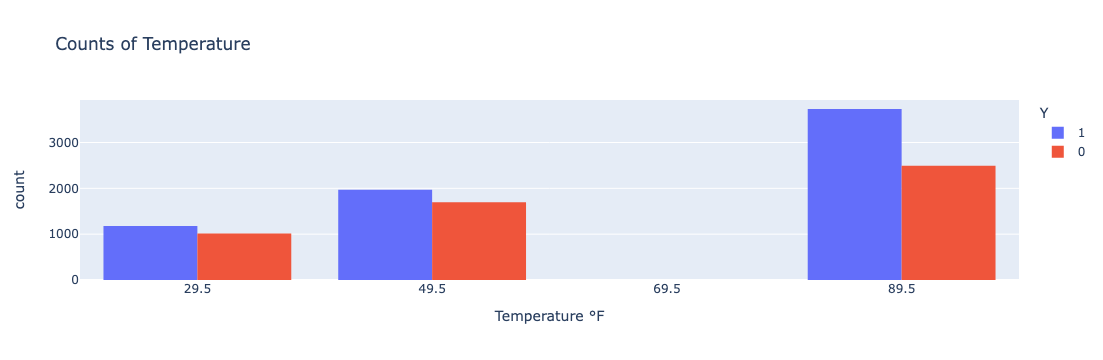

In [425]:
'''
I decide to visualize the temperature column with a histogram using both plotly and seaborn.
I'll use color/hue respectively to compare temperatures between instances where users accepted the coupon vs where they did not

I note that upon using barmode='group' with plotly that the x axis values seem off. The unique values in 'temperature' are 30, 55, and 80. 
With barmode='group' alone those values are altered, despite the tooltip on hover indicating the correct values.
'''

# Creating the histogram using plotly. 
temp_plot = px.histogram(
    cleaned,
    x='temperature',
    color='Y',
    title='Counts of Temperature',
    labels={'temperature': 'Temperature \N{DEGREE SIGN}F'},
    barmode='group')
temp_plot

# *** barmode='group' seems to alter the x axis values

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Histogram of Temperature')

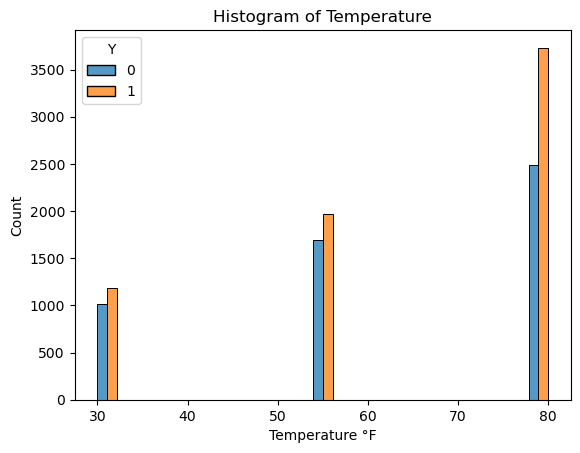

In [426]:
# Now a histogram with seaborn.
seaborn_temp_plot = sns.histplot(data=cleaned, x='temperature', hue='Y', multiple='dodge')
seaborn_temp_plot.set(xlabel='Temperature \N{DEGREE SIGN}F')
seaborn_temp_plot.set_title('Histogram of Temperature')

In [427]:
'''
From the output below, temperatures at 30 and 55 degrees had about a 50/50 split between those that used coupons and those that did not.
For temperatures at 80 degrees Fahrenheit, there does appear to be slightly more users of coupons compared to those that chose not to.
I investigate this further using the function to return the proporations. At 80 degrees, almost 60% used coupons.

I cleaned up the code once I created the function. Originally I had:

    temp_ratio_30 = cleaned.query('temperature == 30')
    temp_ratio_30 = getProportionAccepted(temp_ratio_30)

    temp_ratio_55 = cleaned.query('temperature == 55')
    temp_ratio_55 = getProportionAccepted(temp_ratio_55)

    temp_ratio_80 = cleaned.query('temperature == 80')
    temp_ratio_80 = getProportionAccepted(temp_ratio_80)

    print('Temp 30 Ratio:', temp_ratio_30)
    print('Temp 55 Ratio:', temp_ratio_55)
    print('Temp 80 Ratio:', temp_ratio_80)
'''

print('Temp 30 Ratio:', getProportionAccepted(cleaned.query('temperature == 30')))
print('Temp 55 Ratio:', getProportionAccepted(cleaned.query('temperature == 55')))
print('Temp 80 Ratio:', getProportionAccepted(cleaned.query('temperature == 80')))

Temp 30 Ratio: Y
1    0.53713
0    0.46287
Name: proportion, dtype: float64
Temp 55 Ratio: Y
1    0.537138
0    0.462862
Name: proportion, dtype: float64
Temp 80 Ratio: Y
1    0.599646
0    0.400354
Name: proportion, dtype: float64


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [428]:
# Create bar dataframe using cleaned dataframe
bar = cleaned[cleaned['coupon'] == 'Bar']
bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passenger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?


In [429]:
# Now updated to use the getProportionAccepted function I made--

# bar_ratio = bar['Y'].value_counts(normalize=True)
# bar_ratio
# bar_ratio[1]

bar_accepted = (getProportionAccepted(bar)[1] * 100).round(2)
print(f'The proportion of bar coupons that were accepted is {getProportionAccepted(bar)[1].round(6)}, or {bar_accepted}%')

The proportion of bar coupons that were accepted is 0.411918, or 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [430]:
'''
I first want to look at the unique values in the 'Bar' column. How is bar attendance recorded in the dataframe?
If there aren't too many unique values, I can create a list of either valid or invalid values that I will want to use in a query later on.
Once this list is created, I'll use the .query() method on the bar dataframe from #1 and then use my 
getProportionAccepted() function to compare acceptance rates between the two groups
'''

# Let's look at the unique values in the 'Bar' column
bar['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [431]:
# Get the data for those that went to a bar 3 or fewer times a month vs those that went more than 3 times. Use unique() again to confirm
three_or_fewer = ['never', 'less1', '1~3']

bar_3_or_fewer = bar.query('Bar in @three_or_fewer')

bar_3_or_fewer['Bar'].unique()

array(['never', 'less1', '1~3'], dtype=object)

In [432]:
# Using index [1] to get the value where Y == 1 in the return
bar_3_or_fewer_accept = getProportionAccepted(bar_3_or_fewer)[1].round(6)
bar_greater_than_3 = 1-bar_3_or_fewer_accept

print('Acceptance for group "Bar attendance <=3":', bar_3_or_fewer_accept, 'or', f'{bar_3_or_fewer_accept *100}%')
print('Acceptance for group "Bar attendance >3":', bar_greater_than_3, 'or', f'{bar_greater_than_3 *100}%')

Acceptance for group "Bar attendance <=3": 0.372674 or 37.2674%
Acceptance for group "Bar attendance >3": 0.627326 or 62.732600000000005%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [433]:
'''
There are a few things to filter/query on here:

- I plan to make a list called 'not_more_than_once_a_month' that will hold the opposite 
values that I want. This way I can use a negative or 'not' similar to what was done in the bar attendance comparison above. 
- 'age' values are all strings, so I'll look at the unique values in this column and determine if I can use a comparison > or 
if I need to convert them in some way.

I'll create a variable, drivers_A, to hold the data meeting the criteria:

- 'Bar not in @more_than_once_a_month'
- 'age > 25'

The data opposite of the criteria will be the 1 - acceptance rate of the group. As all Y counts will be split between those
that meet the criteria and Y == 1 and those that do not meet the criteria and Y == 1

Once this is settled, I can use the function I made above to return the acceptance rate(s)
'''

# Look at the age values:
print('unique age values', bar['age'].unique())

unique age values ['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [434]:
# Create the lists used in my queries
not_more_than_once_a_month = ['never', 'less1']
invalid_ages = ['21', 'below21']

In [435]:
# Set my variables
drivers_A = bar.query('Bar not in @not_more_than_once_a_month and age not in @invalid_ages')

drivers_A_accept = getProportionAccepted(drivers_A)[1].round(6)
drivers_A_all_others_accept = 1-drivers_A_accept

In [436]:
# Print the acceptance rates
print('drivers_A acceptance:', drivers_A_accept)
print('All others acceptance:', drivers_A_all_others_accept)

drivers_A acceptance: 0.689826
All others acceptance: 0.31017399999999995


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

In [437]:
'''
I follow a similar pattern to #4 by looking at the values I may be working with, then using the .query() method to filter on 
my dataframe.
I'll assign the subsets to new variables, following my drivers_[X] naming

The wording is a bit strange here. I'll compare both the acceptance rate within the group that meets the criteria, and the acceptance rate
of this group against 'all others' as #4 requested
'''

# Look at passenger and occupation values
print('unique passenger values', bar['passenger'].unique())
print('unique occupations', bar['occupation'].unique())
# The string for the farming, fishing, or forestry check is a full string called 'Farming Fishing & Forestry'

unique passenger values ['Friend(s)' 'Alone' 'Kid(s)' 'Partner']
unique occupations ['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Installation Maintenance & Repair'
 'Transportation & Material Moving' 'Business & Financial'
 'Protective Service' 'Food Preparation & Serving Related'
 'Production Occupations' 'Building & Grounds Cleaning & Maintenance'
 'Farming Fishing & Forestry']


In [438]:
# Create a list for the INVALID passengers, then use 'not' in query
invalid_passengers = ['Alone', 'Kid(s)']

# First query on the same check for those that go to bars more than once a month
drivers_B = bar.query('Bar not in @not_more_than_once_a_month')

# Then query for where passenger is NOT in the invalid passengers list
drivers_B = drivers_B.query('passenger not in @invalid_passengers')

#  Finally grab the entries where the occupation is NOT (using `~`) "Farming Fishing & Forestry"
drivers_B = drivers_B[~drivers_B['occupation'].str.contains("Farming Fishing & Forestry")]
drivers_B_accept = getProportionAccepted(drivers_B)[1].round(5)
drivers_B_all_others_accept = 1-drivers_B_accept

In [439]:
# Print the acceptance rates
print('Acceptance rate of group "drivers_B":', drivers_B_accept, 'or', f'{drivers_B_accept*100}%')
print('Acceptance rate of all others outside of "drivers_B":', drivers_B_all_others_accept, 'or', f'{(drivers_B_all_others_accept) *100}%')

Acceptance rate of group "drivers_B": 0.71429 or 71.429%
Acceptance rate of all others outside of "drivers_B": 0.28571 or 28.571%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [440]:
# Comparing go to bars more than once a month, had passengers that were not a kid, and were not widowed
# Making a copy of the lists I used earlier here just for easier reference
neg_frequency_list = ['never', 'less1']
neg_pass_not_kid = ['Alone', 'Kid(s)']

In [441]:
# First query on the same check for those that go to bars more than once a month
drivers_C = bar.query('Bar not in @neg_frequency_list')

# Then query for passengers
drivers_C = drivers_C.query('passenger not in @neg_pass_not_kid')

#  Finally grab the entries where drivers were not widowed"
drivers_C = drivers_C[~drivers_C['maritalStatus'].str.contains("Widowed")]

In [442]:
# It looks like there may not have been any 'Widowed' values in the first query to begin with. No drivers that go to 
# bars more than once a month appeared to have had a maritalStatus of 'Widowed'

# Print the acceptance rates
drivers_C_accept = getProportionAccepted(drivers_C)[1].round(5)
drivers_C_all_others_accept = 1-drivers_C_accept

print('Acceptance rate of group "drivers_C":', drivers_C_accept, 'or', f'{drivers_C_accept*100}%')
print('Acceptance rate of all others outside of "drivers_C":', drivers_C_all_others_accept, 'or', f'{(drivers_C_all_others_accept) *100}%')

Acceptance rate of group "drivers_C": 0.71429 or 71.429%
Acceptance rate of all others outside of "drivers_C": 0.28571 or 28.571%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [443]:
'''
I print the results from the questions above here again. We can see that of all bar coupons, about 41% were accepted.
How often a driver goes to a bar seems to be a stronger indicator for whether the coupon will be accepted. If a driver
goes to a bar more than 3 times a month, they appear to be more likely to use a bar coupon. Other factors such as age or marital status do not play
as strong of a role in the coupon acceptance.

Moving forward, I would recommend that Bar coupons are especially targeted towards those that frequent bars more than three times a month.
Marital status isn't a strong driver, but those that do not have passengers that are considered a kid may be more likely to 
accept the bar coupon(s) as well.
'''
print(f'The proportion of bar coupons that were accepted is {getProportionAccepted(bar)[1].round(6)}, or {bar_accepted}%')
print('Acceptance for group "Bar attendance <=3":', bar_3_or_fewer_accept, 'or', f'{bar_3_or_fewer_accept *100}%')
print('Acceptance for those who go to a bar more than once a month and are over the age of 25:', drivers_A_accept, 'or', f'{drivers_A_accept *100}%')
print('Acceptance for those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry:', drivers_B_accept, 'or', f'{drivers_B_accept*100}%')
print('Acceptance for those who go to bars more than once a month, had passengers that were not a kid, and were not widowed":', drivers_C_accept, 'or', f'{drivers_C_accept*100}%')

The proportion of bar coupons that were accepted is 0.411918, or 41.19%
Acceptance for group "Bar attendance <=3": 0.372674 or 37.2674%
Acceptance for those who go to a bar more than once a month and are over the age of 25: 0.689826 or 68.9826%
Acceptance for those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 0.71429 or 71.429%
Acceptance for those who go to bars more than once a month, had passengers that were not a kid, and were not widowed": 0.71429 or 71.429%


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [444]:
# Let's explore the carry out and take away coupons

# First set a variable to the filtered data from my cleaned dataset
carry_out = cleaned[cleaned['coupon'] == 'Carry out & Take away']

carry_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2280 entries, 25 to 12680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2280 non-null   object
 1   passenger             2280 non-null   object
 2   weather               2280 non-null   object
 3   temperature           2280 non-null   int64 
 4   time                  2280 non-null   object
 5   coupon                2280 non-null   object
 6   expiration            2280 non-null   object
 7   gender                2280 non-null   object
 8   age                   2280 non-null   object
 9   maritalStatus         2280 non-null   object
 10  has_children          2280 non-null   int64 
 11  education             2280 non-null   object
 12  occupation            2280 non-null   object
 13  income                2280 non-null   object
 14  Bar                   2280 non-null   object
 15  CoffeeHouse           2280 non-null   obj

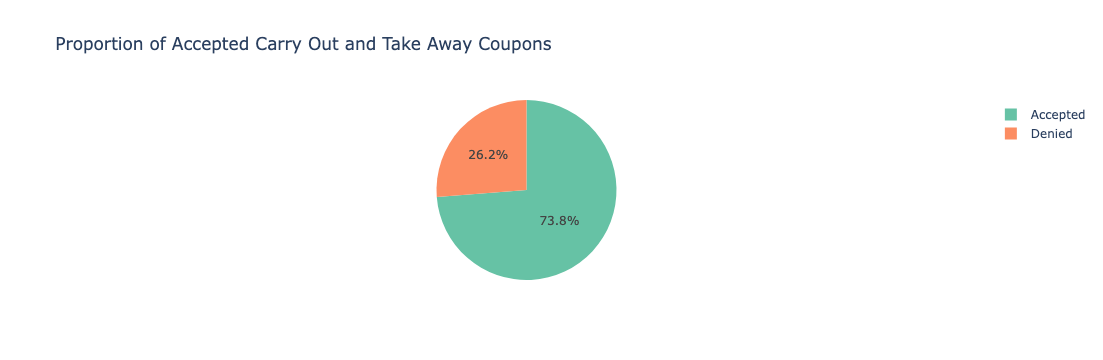

In [445]:
# Visualize the proportion of Y within the carry_out dataframe
carry_out_counts = carry_out['Y'].value_counts()

# Confirmed counts of Y == 1 matches, then created a better key to represent what 1 and 0 means for this pie chart
names_mapper = {1:'Accepted', 0:'Denied'}

carry_out_pie = px.pie(
    carry_out_counts,
    names=names_mapper,
    values=carry_out_counts.values, 
    title='Proportion of Accepted Carry Out and Take Away Coupons',
color_discrete_sequence=px.colors.qualitative.Set2)
carry_out_pie

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 0, 'Temperature °F')

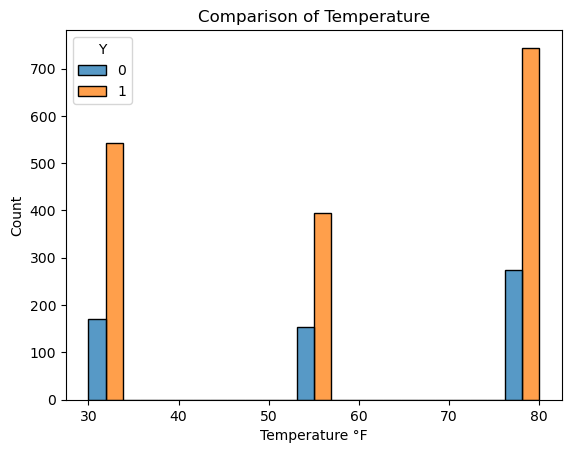

In [446]:
# Visualize carry_out against temperature, marital status...
carry_out_temp = sns.histplot(data=carry_out, x='temperature', hue='Y', multiple='dodge')
carry_out_temp.set_title('Comparison of Temperature')
carry_out_temp.set_xlabel('Temperature \N{DEGREE SIGN}F')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/var/folders/lq/hztwl14x6p10c91mv3z16s2m0000gn/T/ipykernel_64063/3580386786.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



<Axes: title={'center': 'Comparison of Marital Status'}, xlabel='Marital Status', ylabel='Count'>

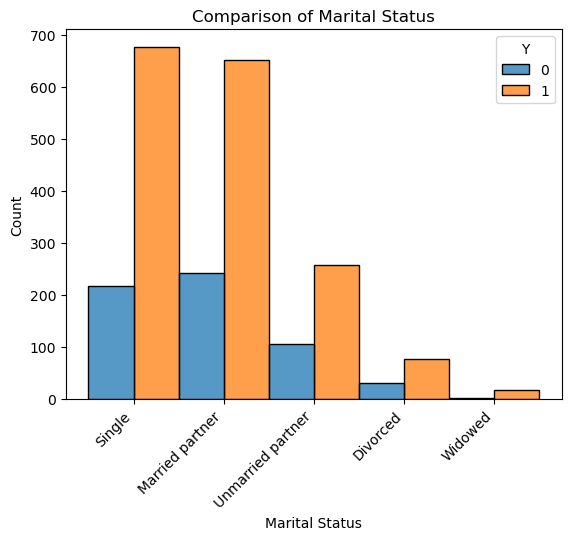

In [447]:
carry_out_marital = sns.histplot(data=carry_out, x='maritalStatus', hue='Y', multiple='dodge')
carry_out_marital.set_title('Comparison of Marital Status')
carry_out_marital.set_xticklabels(carry_out_marital.get_xticklabels(), rotation=45, ha='right')
carry_out_marital.set(xlabel='Marital Status')
carry_out_marital

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



[Text(0.5, 0, 'Weather')]

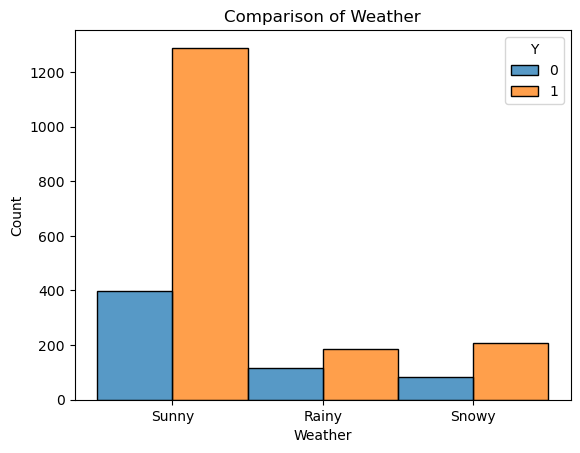

In [448]:
carry_out_weather = sns.histplot(data=carry_out, x='weather', hue='Y', multiple='dodge')
carry_out_weather.set_title('Comparison of Weather')
carry_out_weather.set(xlabel='Weather')

In [449]:
'''
Now that I've quickly and roughly visualized the comparisons between carry out coupon acceptances. Let's do a deeper dive
similar to what we did with the Bar data

Between temperature and marital status alone, drivers typically will use carry out coupons despite the temperature or their marital status. 
A temp of 80 doesn't seem to suggest that a driver will be more likely to use a carry out coupon compared to a lower temperature of 55 or 30.

What is surprising is the spike in counts of Y == 1 for the 'Sunny' weather. Let's investigate this. On one hand there may just be more sunny days
in general. On the other hand there may be interesting relationships between 'Sunny' weather and a driver's decision to use a coupon.
'''


# Comparing the acceptance rate between Sunny weather
sunny_carry_out = carry_out[carry_out['weather'] == "Sunny"]
sunny_carry_out_accept = getProportionAccepted(sunny_carry_out)[1].round(6)
print('Acceptance for carry out coupons in Sunny weather:', sunny_carry_out_accept, 'or', f'{sunny_carry_out_accept*100}%')

# For exploration/testing, let's see what the comparison is for rainy weather
rainy_carry_out = carry_out[carry_out['weather'] == 'Rainy']
rainy_carry_out_accept = getProportionAccepted(rainy_carry_out)[1].round(6)
print('Acceptance for carry out coupons in Rainy weather:', rainy_carry_out_accept, 'or', f'{rainy_carry_out_accept*100}%')

Acceptance for carry out coupons in Sunny weather: 0.764078 or 76.40780000000001%
Acceptance for carry out coupons in Rainy weather: 0.611296 or 61.129599999999996%


In [450]:
# I can see that drivers will often use coupons if the weather is "Sunny". Let's continue to explore this

# I'll add in another filter to see those where direction_same is 1:
same_direction_carry_out = sunny_carry_out[sunny_carry_out['direction_same'] == 1]
same_direction_carry_out_accept = getProportionAccepted(same_direction_carry_out)[1].round(6)

# What about if they are heading in the opposite direction?
opp_direction_carry_out = sunny_carry_out[sunny_carry_out['direction_opp'] == 1]
opp_direction_carry_out_accept = getProportionAccepted(opp_direction_carry_out)[1].round(6)

print('Acceptance for carry out coupons in Sunny weather and heading in the same direction:', same_direction_carry_out_accept, 'or', f'{same_direction_carry_out_accept*100}%')
print('Acceptance for carry out coupons in Sunny weather and heading in the opposite direction:', opp_direction_carry_out_accept, 'or', f'{opp_direction_carry_out_accept*100}%')

Acceptance for carry out coupons in Sunny weather and heading in the same direction: 0.768683 or 76.8683%
Acceptance for carry out coupons in Sunny weather and heading in the opposite direction: 0.761778 or 76.17779999999999%


In [451]:
# Let's investigate the income data
sunny_carry_out['income'].unique()

# Make a list of valid incomes
valid_incomes = ['$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500']

# Query
sunny_income_carry_out = sunny_carry_out.query('income in @valid_incomes')
sunny_not_valid_income_carry_out = carry_out.query('income not in @valid_incomes')

# Set proportion variables
sunny_income_carry_out_accept = getProportionAccepted(sunny_income_carry_out)[1].round(6)
sunny_not_valid_income_carry_out_accept = getProportionAccepted(sunny_not_valid_income_carry_out)[1].round(6)

print('Acceptance for carry out coupons in Sunny weather income is below $50,000:', sunny_income_carry_out_accept, 'or', f'{sunny_income_carry_out_accept*100}%')
print('Acceptance for carry out coupons in Sunny weather income is greater than $50,000:', sunny_not_valid_income_carry_out_accept, 'or', f'{sunny_not_valid_income_carry_out_accept*100}%')

Acceptance for carry out coupons in Sunny weather income is below $50,000: 0.756146 or 75.6146%
Acceptance for carry out coupons in Sunny weather income is greater than $50,000: 0.741266 or 74.1266%


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/var/folders/lq/hztwl14x6p10c91mv3z16s2m0000gn/T/ipykernel_64063/2877820573.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(0.5, 0, 'Education')

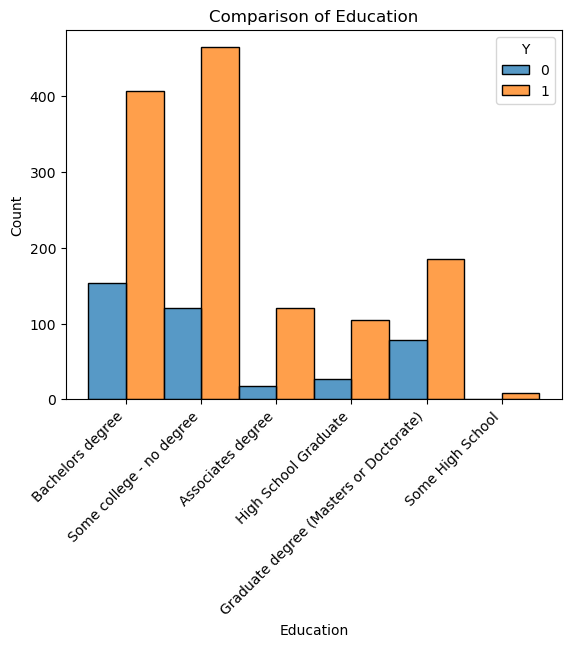

In [452]:
# Consider education
sunny_carry = sns.histplot(data=sunny_carry_out, x='education', hue='Y', multiple='dodge')
sunny_carry.set_xticklabels(sunny_carry.get_xticklabels(), rotation=45, ha='right')
sunny_carry.set_title('Comparison of Education')
sunny_carry.set_xlabel('Education')

In [453]:
# Let's investigate the education data
sunny_carry_out['education'].unique()

# Set a list for the higher education strings
higher_ed = ['Bachelors degree', 'Graduate degree (Masters or Doctorate)']

# Query
sunny_ed_carry_out = sunny_carry_out.query('education in @higher_ed')
not_in_higher_ed = sunny_carry_out.query('education not in @higher_ed')

# Set proportion variables
sunny_ed_carry_out_accept = getProportionAccepted(sunny_ed_carry_out)[1].round(6)
not_in_higher_ed_accept = getProportionAccepted(not_in_higher_ed)[1].round(6)

print('Acceptance for carry out coupons in Sunny weather and holds a degree of Bachelors or greater:', sunny_ed_carry_out_accept, 'or', f'{sunny_ed_carry_out_accept*100}%')
print('Acceptance for carry out coupons in Sunny weather and holds no degree or degree below Bachelors:', not_in_higher_ed_accept, 'or', f'{not_in_higher_ed_accept*100}%')

Acceptance for carry out coupons in Sunny weather and holds a degree of Bachelors or greater: 0.718104 or 71.8104%
Acceptance for carry out coupons in Sunny weather and holds no degree or degree below Bachelors: 0.80787 or 80.78699999999999%


In [454]:
# To summarize, a large percentage of the overall carry out and take away coupons were accepted. As visualized in the pie chart, 
# 73.8% of carry out coupons were accepted. 

# Marital status, temperature, income, and whether the driver was heading in the same direction were not great indicators
# of whether the carry out coupons would be used. Instead, it appears that sunny weather is a stronger indicator for determining
# whether carry out coupons would be accepted. 76.4% of carry out coupons were accepted during Sunny weather, whereas during Rainy
# weather, 61.1% of the carry out coupons were accepted. 

# Within the subset of carry out coupons during Sunny weather, those that held a degree equivalent or greater than a Bachelors demonstrated
# an acceptance rate of about 70.0%. On the other hand, those with no degree or a degree below a Bachelors had a greater acceptance rate at 80.8%.

# Coupons for carry out and take away should be distributed to drivers, especially during Sunny weather. Those with an education level below a Bachelors
# may be more inclined to use a carry out coupon compared to drivers with a Bachelors degree or greater.